### README:
This is a code to train the corpus of climate change into dynamic word embedding model. The corpus is kept in 'examples/training/' folder. code written by Sabrina Tiun (2022).


### NOTE for setup TWEC:<br>
1. Use gensim 3.8.3 or earlier.<br>
2. Use old copy of twec-master (downloaded 2019, and I name it twec-master-old)<br>
3. put your notebook (inside the twec-master-old folder)<br>
4. to create VE for twec master do: (ref: https://anbasile.github.io/posts/2017-06-25-jupyter-venv/)<br>
python -m venv twec-master-old <br>
source twec-master-old/bin/activate <br>
pip install ipykernal<br>
ipython kernel install --user --name=twec_kernel<br>
5. to use the twec, make sure in jupyter change your kernel into twec-kernel<br>
6. if your run 'from twec.twec import TWEC' doesnt give any error - your kernel is ok.<br>
7. if error happens - check at terminal that your have twec-master-old vritual env (activated)

### TWEC references
[1]hhttps://github.com/valedica/twec <br>
[2]https://medium.com/@eleroy/jupyter-notebook-in-a-virtual-environment-virtualenv-8f3c3448247 <br>
[3]https://medium.com/@fb_vinid/aligning-temporal-diachronic-word-embeddings-with-a-compass-732ab7427955 <br>
[4https://towardsdatascience.com/measuring-semantic-changes-using-temporal-word-embedding-6fc3f16cfdb4 <br>

## reference of similiar studies:
[1]https://arxiv.org/pdf/2010.00761.pdf
[2]https://arxiv.org/pdf/1703.00607.pdf
[3]https://escholarship.org/uc/item/9tp9g31f


In [ ]:
from twec.twec import TWEC

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
aligner = TWEC(size=30,siter=10,diter=10, workers=4)

In [6]:
aligner.train_compass("examples/training/clean_climate_all.txt", overwrite=False)

Training the compass.
Initializing temporal embeddings from the atemporal compass.


In [11]:
slice_1 = aligner.train_slice("examples/training/clean_all_2015.txt", save=True)
slice_2 = aligner.train_slice("examples/training/clean_all_2016.txt", save=True)
slice_3 = aligner.train_slice("examples/training/clean_all_2017.txt", save=True)
slice_4 = aligner.train_slice("examples/training/clean_all_2018.txt", save=True)
slice_5 = aligner.train_slice("examples/training/clean_all_2019.txt", save=True)
slice_6 = aligner.train_slice("examples/training/clean_all_2020.txt", save=True)
slice_7 = aligner.train_slice("examples/training/clean_all_2021.txt", save=True)

Training temporal embeddings: slice examples/training/clean_all_2015.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice examples/training/clean_all_2016.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice examples/training/clean_all_2017.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice examples/training/clean_all_2018.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice examples/training/clean_all_2019.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice examples/training/clean_all_2020.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice examples/training/clean_all_2021.txt.
Initializing temporal embeddings from the atemporal compass.


Load model 

In [14]:
model1 = Word2Vec.load("model/clean_all_2015.model")
model2 = Word2Vec.load("model/clean_all_2016.model")
model3 = Word2Vec.load("model/clean_all_2017.model")
model4 = Word2Vec.load("model/clean_all_2018.model")
model5 = Word2Vec.load("model/clean_all_2019.model")
model6 = Word2Vec.load("model/clean_all_2020.model")
model7 = Word2Vec.load("model/clean_all_2021.model")

In [144]:
#word to be analyzed:
word  = 'power'
word2 = 'energy'
word3 = 'environment'
word4 = 'forest'
word5 = 'water'
word6 = 'loss' #nor exist
word7 = 'river'
word8 = 'activity'

### MOST SIMILIAR ANALYSIS<br>

In [146]:
model6.wv.most_similar(positive=[word8], topn=10)

[('demonstrates', 0.744025468826294),
 ('decreased', 0.6450361013412476),
 ('significantly', 0.6394823789596558),
 ('effects', 0.6340947151184082),
 ('induced', 0.6217095255851746),
 ('patterns', 0.6154937148094177),
 ('caused', 0.6027446985244751),
 ('rate', 0.6024799346923828),
 ('loss', 0.592653751373291),
 ('decrease', 0.5885190963745117)]

### Self-similarity analysis
This analysis will see the semantic strength of a word at different time.

In [61]:
import numpy as np

In [62]:
def cos_similarity(vec1, vec2):
    #vectors
    a = np.array(vec1)
    b = np.array(vec2)
    
    # manually compute cosine similarity
    dot = np.dot(a, b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    cos = dot / (norma * normb)
    return cos

In [65]:
#to see one word located at different time
vector1 = model1.wv[word] 
vector2 = model7.wv[word] 
cos_similarity(vector1, vector2)

0.94943786

### User defined method analysis. 
This analysis will see two different words at the different time
Refer to baoudih( 2018)

In [148]:
vector_reference = model1.wv[word4] 
vector_target = model7.wv[word8] 
cos_similarity(vector_reference, vector_target )

0.25599617

### Example:
1. have a target word (e.g 'water')
2. find the semantic shift of 'water' from one time (model) to another time (model)
3. get the semantic value.

In [107]:
word4 = 'water'
vector1 = model1.wv[word4] #word water from 2015
vector2 = model2.wv[word4] #word water from 2016
cos_similarity(vector1, vector2)

0.92005664

### To display semantic shift of the DWECC model

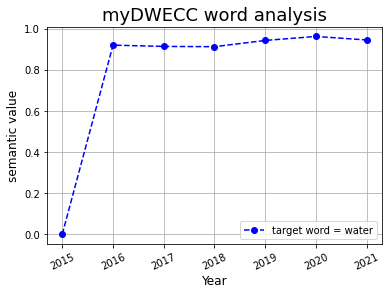

In [132]:
import matplotlib.pyplot as plt
  
x = ['2015','2016','2017','2018','2019','2020','2021'] #the year
y = [0.0,0.92005664,0.9139204,0.91256535,0.9430422,0.9624205,0.94540465] # semantic value
  
plt.plot(x, y, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "target word = water")
  
plt.xticks(rotation = 25)
plt.xlabel('Year',fontsize = 12)
plt.ylabel('semantic value',fontsize = 12)
plt.title('myDWECC word analysis', fontsize = 18)
plt.grid()
plt.legend()
plt.show()